# GFER-DRP1 20181212
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports


In [2]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [3]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [4]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [5]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.0
   pandas: 0.23.3
   seaborn: 0.9.0


# General

In [6]:
patients = {"AV": {'age': 6*4, "gender": "M", "color": "cornflowerblue"}, 
            "EV": {"age": 5.5*12*4, "gender": "F", "color": "violet"},
            "HC CM": {"age": 6*12*4, "gender": "F", "color": "green"},
            "AG044": {"age": 15, "gender": "F", "color": "limegreen"},
            "AG015": {"age": 3/7, "gender": "M", "color": "cyan"},
            "HV": {"age": 37*12*4, "gender": "F", "color": "darkviolet"},
            "MV": {"age": 36.5*12*4, "gender": "M", "color": "royalblue"},
            "HC IK": {"age": 32*12*4, "gender": "F", "color": "gray"},
            "HC OZ": {"age": 35*12*4, "gender": "M", "color": "yellow"},
            "HC NA0730":{"age": 53*12*4, "gender": "M", "color": "coral"}}
patients_df = pd.DataFrame(patients).T
patients_df

age           color gender
AV               24  cornflowerblue      M
EV              264          violet      F
HC CM           288           green      F
AG044            15       limegreen      F
AG015      0.428571            cyan      M
HV             1776      darkviolet      F
MV             1752       royalblue      M
HC IK          1536            gray      F
HC OZ          1680          yellow      M
HC NA0730      2544           coral      M

In [7]:
col_map = {2:"AV", 3:"EV", 4:"HC CM", 5:"AG044", 6:"AG015", 7:"HV", 8:"MV", 9:"HC IK", 10:"HC OZ", 11:"HC NA0730"}
col_map

{2: 'AV',
 3: 'EV',
 4: 'HC CM',
 5: 'AG044',
 6: 'AG015',
 7: 'HV',
 8: 'MV',
 9: 'HC IK',
 10: 'HC OZ',
 11: 'HC NA0730'}

In [8]:
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, CategoricalColorMapper, LabelSet
from bokeh.palettes import Set3
from bokeh.palettes import d3
from bokeh.models.tools import HoverTool
from bokeh.models import NumeralTickFormatter


def plot_column(df, column_name, agg='50%'):

    TOOLS='pan,wheel_zoom,box_zoom,reset'

    source = ColumnDataSource(df)
    patients_names =  source.data['Pcol'].tolist()
    plot_options = dict(width=750, plot_height=350,tools=TOOLS)
    p = figure(**plot_options, x_range=patients_names)


    # palette = d3['Category10'][len(patients_names)]
    # palette = [patients[pn]['color'] for pn in patients_names]
    # color_map = CategoricalColorMapper(factors=patients_names, palette=palette)
    
    source.data['color'] = [patients[pn]['color'] for pn in patients_names]
    source.data['age'] = [patients[pn]['age']/4/12 for pn in patients_names]
    source.data['gender'] = [patients[pn]['gender'] for pn in patients_names]
    
    cell_count = df["Pcol"].count().to_dict()
    source.data['cell_count'] = [cell_count[pn] for pn in patients_names]

    # renderer = p.vbar(x='Pcol', top='Cox17 IxA_50%', width=0.95, line_color="gray", source=source, color={'field': 'Pcol', 'transform': color_map})
    renderer = p.vbar(x='Pcol', top=f"{column_name}_{agg}", width=0.95, line_color="gray", source=source, color='color')
    
    source.data[f"formatted_{column_name}_{agg}"] = [f"{x:,.4f}" if x<10 else f"{x:,.0f}" for x in source.data[f"{column_name}_{agg}"]]
    labels = LabelSet(x='Pcol', y=f"{column_name}_{agg}", text=f"formatted_{column_name}_{agg}", level='glyph',
        x_offset=-30, y_offset=0, source=source, render_mode='canvas')
    p.add_layout(labels)

    p.add_tools(HoverTool(tooltips= [("Name", "@Pcol"), ("Age", "@age"), ("Gender", "@gender"), ("Cell count", "@cell_count")], renderers=[renderer], mode='mouse'))
    p.yaxis[0].formatter = NumeralTickFormatter(format="0,0.00")

    show(p)

# Drp1

## Loading Data

In [9]:
data_path = ".\\Data\\GFER-DRP1 20181212\\COX SEG. Prtocol221118.2018.XLS"

In [10]:
df_drp1 = pd.read_excel(data_path, sheet_name='mito_cell_nuc', header=1)

# remove redundent column
df_drp1.drop("Target",axis=1, inplace=True)

# rename columns
df_drp1.columns = df_drp1.columns.str.replace("Mitochondrial", "Drp1")
df_drp1.rename({"cox total int": "Drp1 total intensity"}, axis="columns", inplace=True)

# extract the positional data 
loc_df = df_drp1.Section.str.extract("(.*) - (.*) \(fld (.*)\).*",expand=True)
loc_df.columns=["Prow","Pcol", "Pfield"]
loc_df.Pcol = loc_df.Pcol.astype(np.int16)
df_drp1 = pd.concat([df_drp1, loc_df], axis=1)
df_drp1.drop("Section",axis=1, inplace=True)

# replace rows with patients names and join patients data
df_drp1.Pcol.replace([2,3,4,5,6,7,8,9,10,11], 
                ["AV", "HC CM", "EV", "AG044", "HV", "AG015", "HC IK", "MV", "HC OZ", "HC NA0730"],
               inplace=True)
df_drp1 = df_drp1.join(patients_df, on='Pcol')

df_drp1.sample(7)

Nuclear area  Nuclear perimeter  Nuclear IxA  Nuclear intensity  Nuclear 1/form factor Cell cycle Toxicity status  Drp1 total intensity  Drp1 count  Drp1 mean area  Drp1 mean intensity  Drp1 total area     Drp1 IxA     Cell status  Cell area  Cell length  Cell perimeter  Cell 1/form factor  Cell intensity    Cell IxA Prow   Pcol Pfield       age       color gender
1880       175.868             49.803   663127.182           3770.590                  0.891  G2M phase  Early toxicity            140626.489          19           2.218             7984.549           42.145   336508.869  Early toxicity   1995.814       91.520         320.160               0.245         265.661  530210.491    D  AG015     17  0.428571        cyan      M
1328       225.407             56.685   716077.578           3176.819                  0.882  G2M phase  Early toxicity            263575.835          25           2.476             9535.563           61.897   590224.453  Early toxicity   2856.143      185.436         493.979               0.147         265.357  757897.044    D     HV      9      1776  darkviolet      F
1867       219.915             54.669   615783.340           2800.103                  0.925  G2M phase  Early toxicity            253542.926          20           0.903            10818.585           18.062   195406.857  Early toxicity   2702.351      206.070         701.503               0.069         246.600  666400.867    D  AG015     16  0.428571        cyan      M
1359       199.740             50.666   826426.199           4137.512                  0.978  G2M phase  Early toxicity             16297.425           4           1.135             3796.884            4.542    17245.230  Early toxicity   1663.936       88.622         393.069               0.135         318.746  530372.945    D     HV     11      1776  darkviolet      F
298        178.931             52.576   813452.719           4546.170                  0.813  G2M phase  Early toxicity            196841.393          13           6.264            18520.822           81.438  1508300.516  Early toxicity   1030.176      121.412         388.614               0.086         463.616  477606.445    D  HC CM      1       288       green      F
1735       227.097             55.746   550398.372           2423.625                  0.918  G2M phase  Early toxicity            403692.135          44           0.991             8829.344           43.624   385169.347  Early toxicity   3655.102       92.324         522.878               0.168         240.512  879095.311    D  AG015      9  0.428571        cyan      M
1458       220.971             53.283   715632.890           3238.586                  0.978  G2M phase  Early toxicity            101038.173          14           3.048             7180.215           42.673   306402.335  Early toxicity   3867.834      228.805         846.734               0.068         242.782  939041.461    D     HV     15      1776  darkviolet      F

In [11]:
df_drp1.describe()

Nuclear area  Nuclear perimeter   Nuclear IxA  Nuclear intensity  Nuclear 1/form factor  Drp1 total intensity   Drp1 count  Drp1 mean area  Drp1 mean intensity  Drp1 total area      Drp1 IxA     Cell area  Cell length  Cell perimeter  Cell 1/form factor  Cell intensity      Cell IxA
count   3256.000000        3256.000000  3.256000e+03        3256.000000            3256.000000          3.256000e+03  3256.000000     3256.000000          3256.000000      3256.000000  3.256000e+03   3256.000000  3256.000000     3256.000000         3256.000000     3256.000000  3.256000e+03
mean     215.298124          54.960777  9.793598e+05        3985.431799               0.890145          2.500869e+05    20.242629        6.923433         11518.018474        73.848852  8.889888e+05   3271.660307   145.237780      551.476071            0.173826      301.246774  9.325394e+05
std       90.445083           9.294855  5.311994e+06        2832.452779               0.073046          2.645312e+05    17.470047       11.610616          4482.712959        62.618117  9.426086e+05   2320.380468    56.068515      313.707765            0.111751       79.334300  5.809664e+05
min      101.507000          37.028000  2.913213e+04         216.147000               0.240000          3.364000e+03     1.000000        0.106000          3364.000000         0.106000  3.553280e+02   1002.185000    39.925000      134.232000            0.011000      169.231000  2.480956e+05
25%      187.698000          51.170750  7.110734e+05        3290.382750               0.861000          8.843263e+04     8.000000        1.118750          8584.355000        27.040000  2.752640e+05   1844.741750   104.525750      360.701500            0.094000      257.595000  5.704440e+05
50%      209.986000          54.418000  7.786356e+05        3741.882000               0.906500          1.718783e+05    16.000000        3.238500         10729.049500        65.647000  6.785317e+05   2628.412000   137.192500      485.070500            0.144000      285.673000  7.799280e+05
75%      233.038500          57.398500  8.518133e+05        4322.614750               0.939000          3.226660e+05    27.000000        8.144250         13464.003250       103.963250  1.188014e+06   3910.137750   176.045250      651.878500            0.219250      328.924750  1.107167e+06
max     4263.406000         365.825000  2.654900e+08       62271.659000               0.985000          3.115940e+06   200.000000      152.102000         48885.333000       727.556000  1.215469e+07  20933.499000   495.506000     4303.766000            0.725000     3032.462000  6.141102e+06

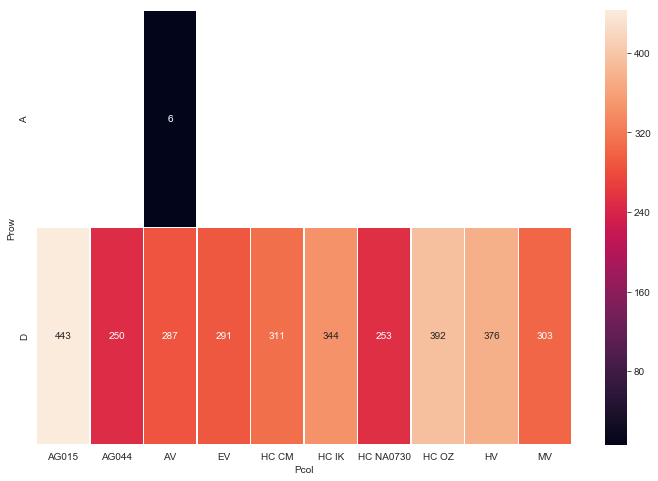

In [12]:
cell_in_well = df_drp1.groupby(["Prow", "Pcol"])["Pfield"].count()
cell_in_well = cell_in_well.unstack(level=-1)

cell_in_well = cell_in_well.rename(col_map, axis=1)

display(sns.heatmap(cell_in_well, linewidths=0.5,annot=True, fmt="0.00f"))

In [13]:
df_drp1 = df_drp1[df_drp1["Prow"]!='A']

## Group by patient


In [15]:
df_drp1["Drp1 area ratio*"] = df_drp1['Drp1 total area']/df_drp1['Cell area']
df_drp1["Drp1 total intensity ratio*"] = df_drp1["Drp1 total intensity"]/df_drp1['Cell intensity']
df_drp1["Drp1 IxA ratio*"] = df_drp1["Drp1 IxA"]/df_drp1['Cell IxA']

In [16]:
drp1_features = df_drp1.columns[df_drp1.columns.str.contains("Drp1")].tolist()
drp1_features.remove('Drp1 count')
drp1_features.remove('Drp1 mean area')
drp1_features.remove('Drp1 mean intensity')

In [17]:
df_grp_row = df_drp1.groupby("Pcol")

drp1_medians = df_grp_row[drp1_features].median()
display(drp1_medians)

Drp1 total intensity  Drp1 total area     Drp1 IxA  Drp1 area ratio*  Drp1 total intensity ratio*  Drp1 IxA ratio*
Pcol                                                                                                                         
AG015               156412.6330          51.8630  566019.9100          0.023958                   545.673090         0.943521
AG044               263310.6365          60.1015  818192.5535          0.031030                   855.305883         1.362856
AV                  165802.2920          72.2490  658345.8900          0.030354                   521.725897         0.874795
EV                  204701.0300          60.1020  565323.4090          0.022596                   597.595834         0.631649
HC CM               215591.0160          72.0370  661066.7250          0.038920                   530.197311         0.970060
HC IK               202350.8630          79.1670  881444.7100          0.021609                   780.049258         0.902596
HC NA0730           163068.8340          78.5860  838136.5960          0.016489                   637.769235         0.706628
HC OZ                94547.3410          68.6045  629395.0160          0.023540                   344.969993         0.771075
HV                  195174.9925          49.7500  499839.2040          0.018825                   722.785059         0.661729
MV                  150776.4010          85.9800  992209.6580          0.020788                   589.981207         0.979966

In [18]:
plot_column(df_grp_row, 'Drp1 total area')

In [19]:
plot_column(df_grp_row, 'Drp1 total intensity')

In [20]:
plot_column(df_grp_row, 'Drp1 area ratio*')

In [21]:
plot_column(df_grp_row, 'Drp1 IxA')

In [22]:
plot_column(df_grp_row, 'Drp1 IxA ratio*')

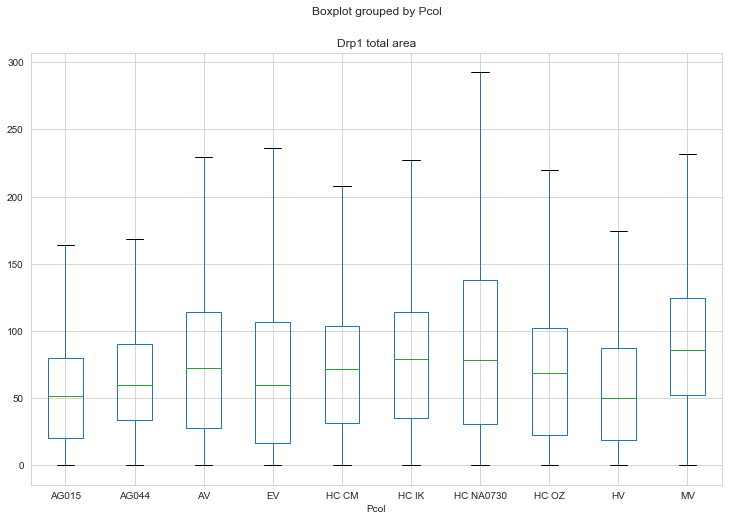

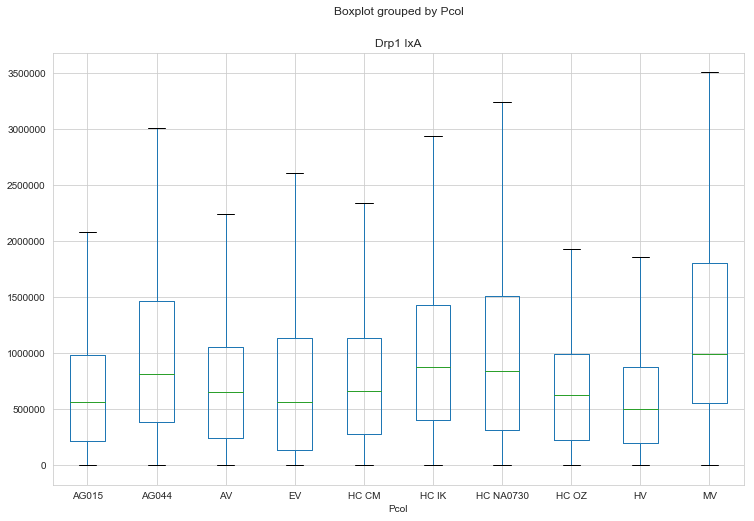

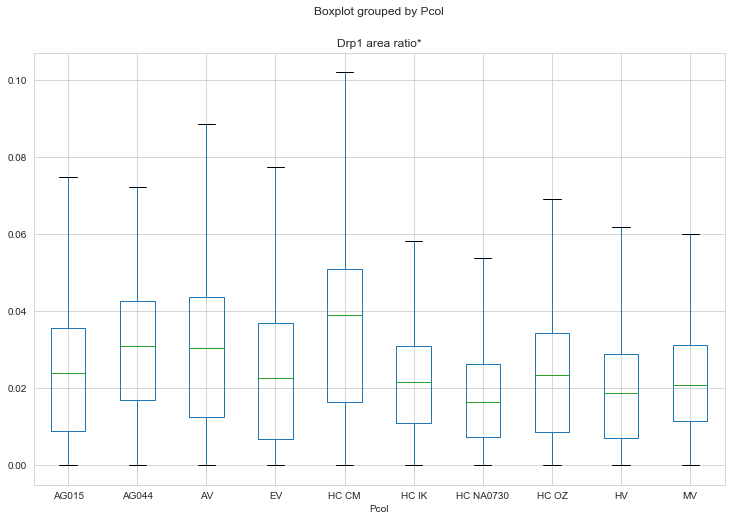

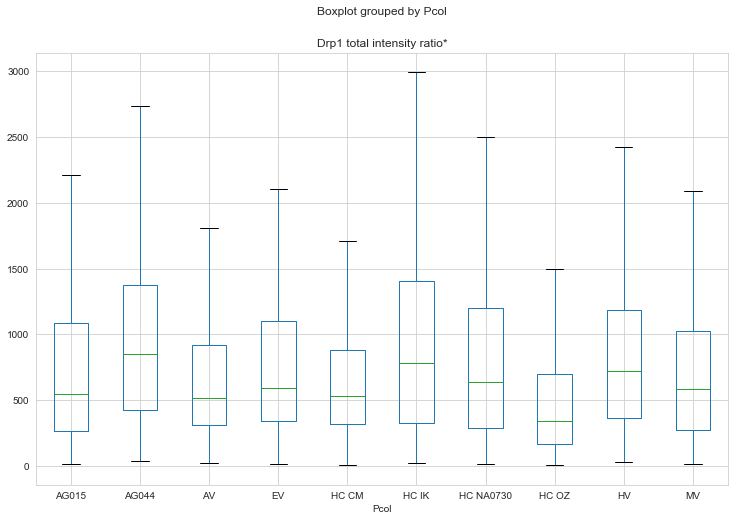

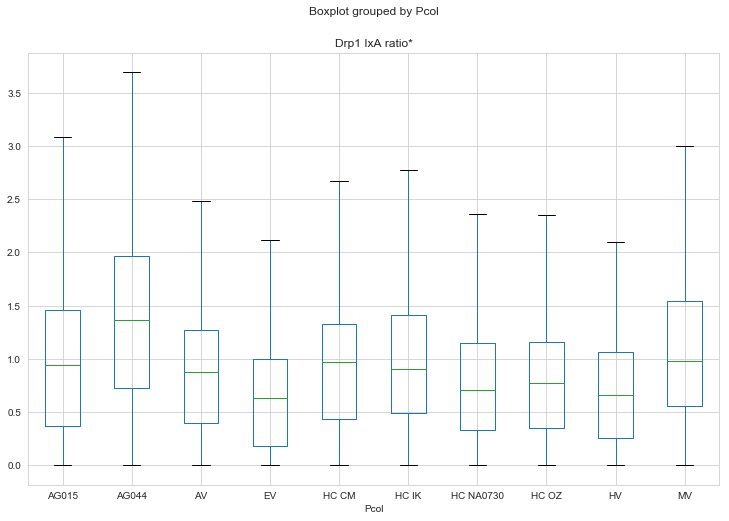

In [47]:
for feature in drp1_features:
    df_drp1.boxplot(column=feature, by='Pcol', showfliers=False)